### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [24]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [34]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [35]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [36]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [68]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [69]:
data = pd.read_csv('autos.csv')

In [70]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [5]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []


In [72]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


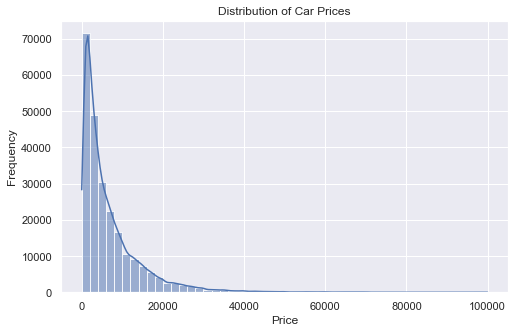

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация распределения целевой переменной (цены)
plt.figure(figsize=(8, 5))
sns.histplot(data['price'], bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()


/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


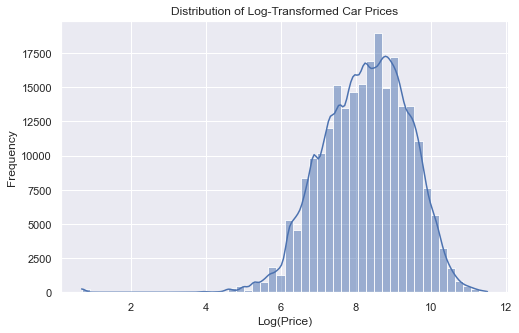

In [75]:
# Добавляем небольшое число, чтобы избежать log(0)
data['log_price'] = np.log1p(data['price'])

# Визуализируем распределение логарифмированной цены
plt.figure(figsize=(8, 5))
sns.histplot(data['log_price'], bins=50, kde=True)
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Car Prices')
plt.show()

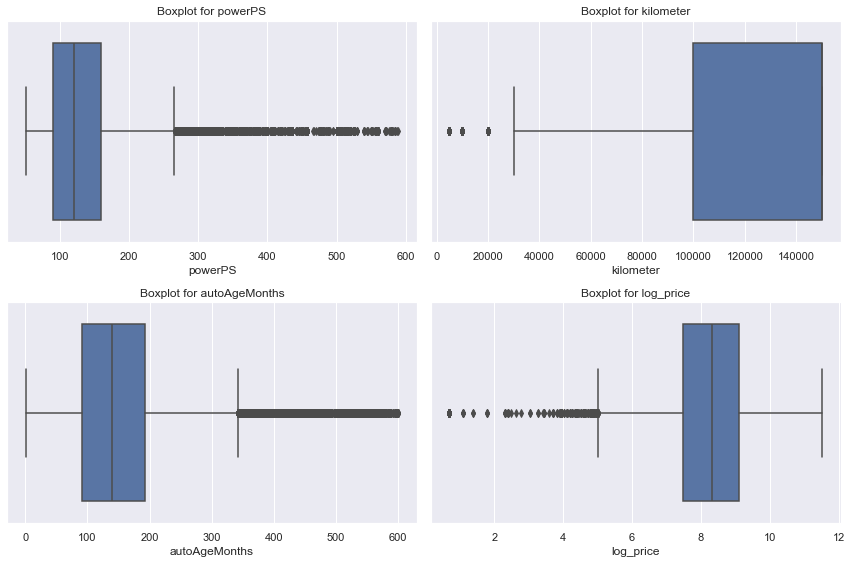

In [76]:
# Построение boxplot для всех числовых переменных
numeric_features = ['powerPS', 'kilometer', 'autoAgeMonths', 'log_price']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()


In [77]:
# Функция для расчета IQR и выявления выбросов
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Анализ выбросов для каждого числового признака
for col in numeric_features:
    num_outliers, lower, upper = detect_outliers(data, col)
    print(f"{col}: {num_outliers} выбросов (границы: {lower:.2f}, {upper:.2f})")


powerPS: 8065 выбросов (границы: -15.00, 265.00)
kilometer: 7262 выбросов (границы: 25000.00, 225000.00)
autoAgeMonths: 2733 выбросов (границы: -58.00, 342.00)
log_price: 791 выбросов (границы: 5.01, 11.56)


In [78]:
# Фильтрация данных: удаляем выбросы на основе IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Применяем к числовым признакам
for col in ['powerPS', 'kilometer', 'autoAgeMonths', 'log_price']:
    data = remove_outliers(data, col)

# Выводим новые размеры датасета
print(f"Размер данных после удаления выбросов: {data.shape}")


Размер данных после удаления выбросов: (222660, 12)


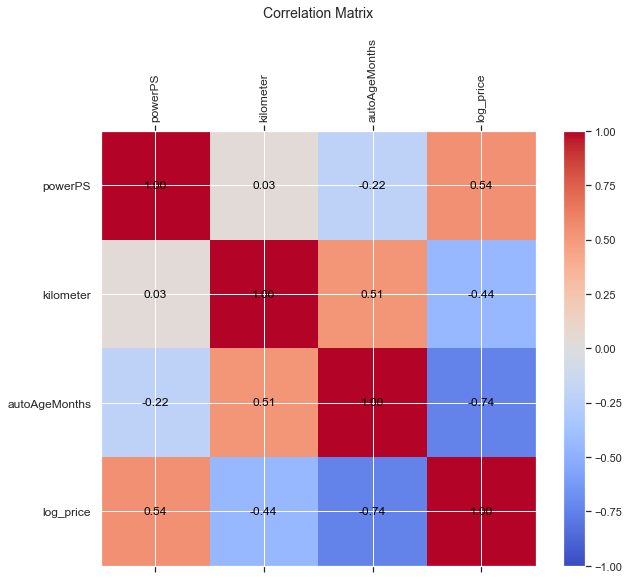

In [79]:
import matplotlib.pyplot as plt

# Получаем значения корреляции
corr_matrix = data[numeric_features].corr().values
labels = numeric_features

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)

# Добавляем числовые подписи на матрице
for (i, j), val in np.ndenumerate(corr_matrix):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=12, color="black")

# Настройка осей
plt.xticks(range(len(labels)), labels, rotation=90, fontsize=12)
plt.yticks(range(len(labels)), labels, fontsize=12)
plt.colorbar(cax)
plt.title("Correlation Matrix", fontsize=14, pad=20)
plt.show()

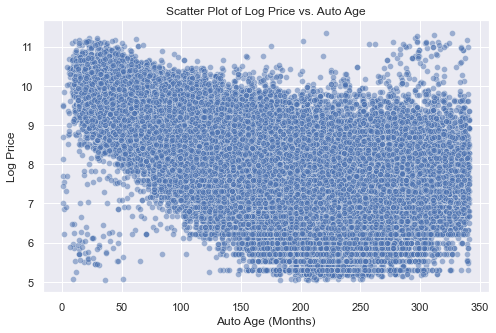

In [80]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["autoAgeMonths"], y=data["log_price"], alpha=0.5)
plt.xlabel("Auto Age (Months)")
plt.ylabel("Log Price")
plt.title("Scatter Plot of Log Price vs. Auto Age")
plt.show()

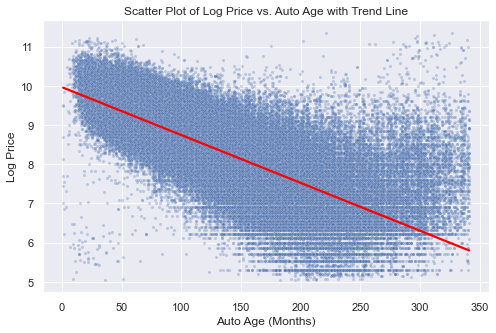

In [81]:
plt.figure(figsize=(8, 5))

# Построим точки (10% данных для читаемости)
sns.scatterplot(x=data["autoAgeMonths"], y=data["log_price"], alpha=0.3, s=10)

# Добавим линию тренда
sns.regplot(x=data["autoAgeMonths"], y=data["log_price"], scatter=False, color="red")

plt.xlabel("Auto Age (Months)")
plt.ylabel("Log Price")
plt.title("Scatter Plot of Log Price vs. Auto Age with Trend Line")
plt.show()


/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:111

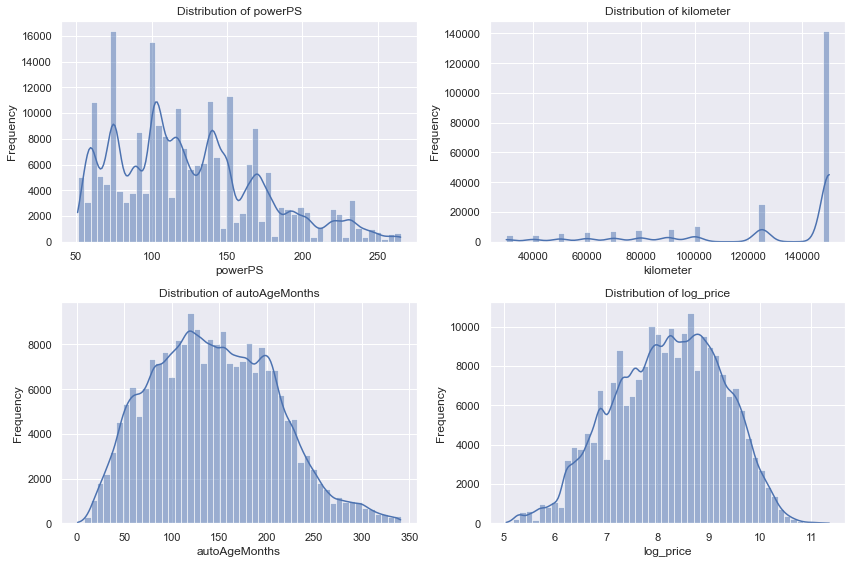

In [82]:
# Строим гистограммы распределения для всех числовых признаков
numeric_features = ['powerPS', 'kilometer', 'autoAgeMonths', 'log_price']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Плохой график по километрам. Прологарифмируем:

/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


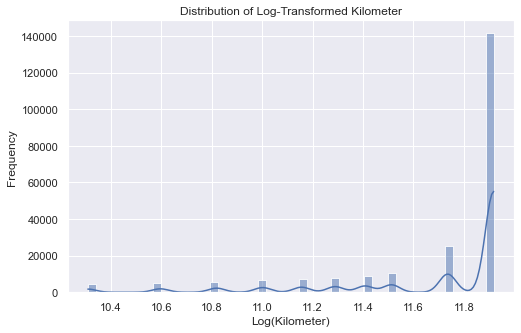

In [83]:
# Добавляем логарифмированное значение пробега
data["log_kilometer"] = np.log1p(data["kilometer"])

# Визуализируем новое распределение
plt.figure(figsize=(8, 5))
sns.histplot(data["log_kilometer"], bins=50, kde=True)
plt.xlabel("Log(Kilometer)")
plt.ylabel("Frequency")
plt.title("Distribution of Log-Transformed Kilometer")
plt.show()

Логарифмирование ничего не изменило. Разобьём на категории

In [84]:
bins = [0, 50_000, 100_000, 150_000, 200_000, np.inf]
labels = ["0-50k", "50-100k", "100-150k", "150-200k", "200k+"]

data["kilometer_category"] = pd.cut(data["kilometer"], bins=bins, labels=labels)

In [85]:
# Корень тоже может почь

data["sqrt_kilometer"] = np.sqrt(data["kilometer"])


/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


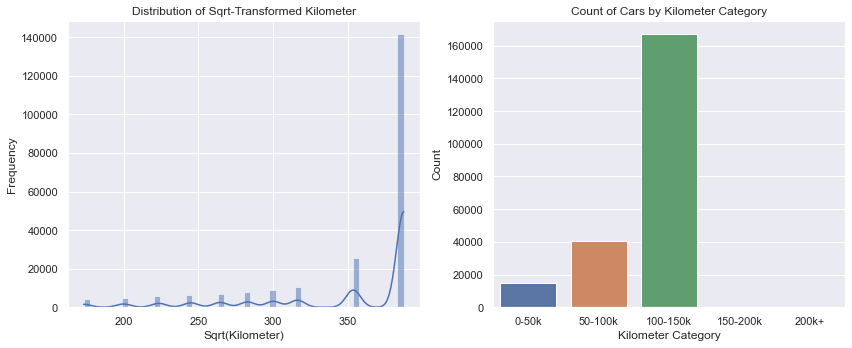

In [86]:
plt.figure(figsize=(12, 5))

# Гистограмма для sqrt_kilometer
plt.subplot(1, 2, 1)
sns.histplot(data["sqrt_kilometer"], bins=50, kde=True)
plt.xlabel("Sqrt(Kilometer)")
plt.ylabel("Frequency")
plt.title("Distribution of Sqrt-Transformed Kilometer")

# Гистограмма для категорий километража
plt.subplot(1, 2, 2)
sns.countplot(x=data["kilometer_category"], order=["0-50k", "50-100k", "100-150k", "150-200k", "200k+"])
plt.xlabel("Kilometer Category")
plt.ylabel("Count")
plt.title("Count of Cars by Kilometer Category")

plt.tight_layout()
plt.show()

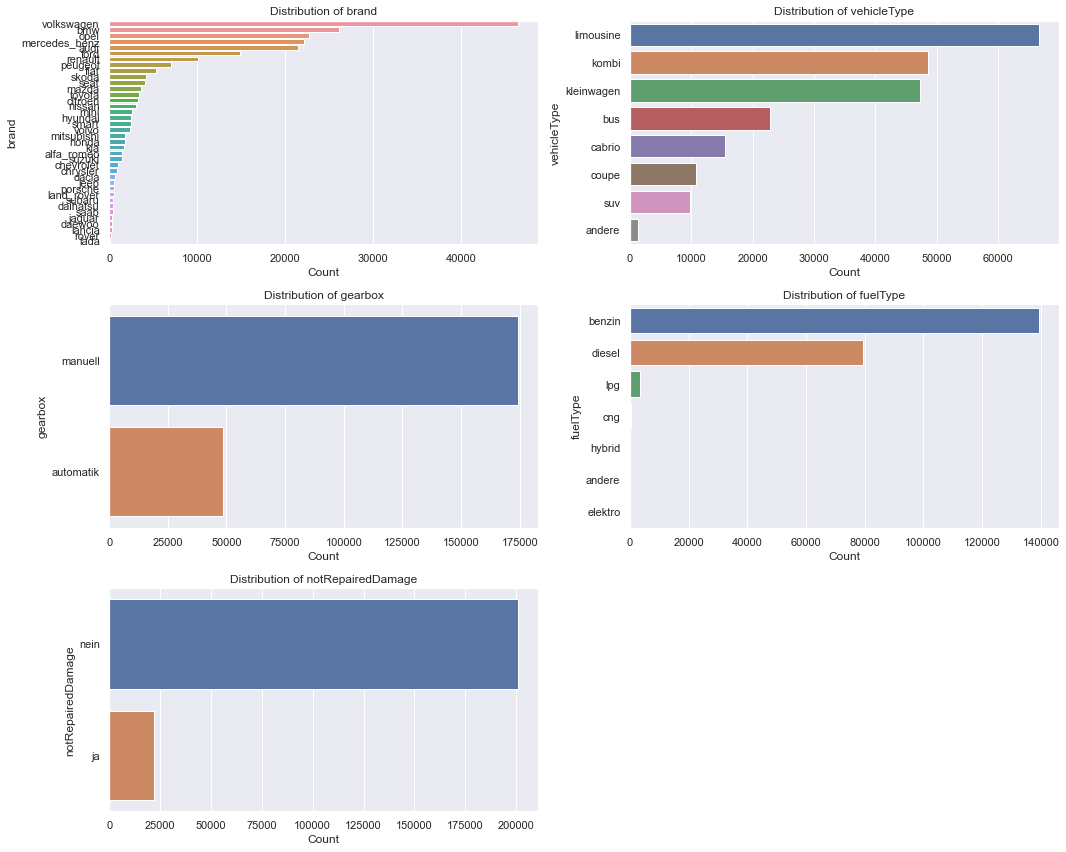

In [88]:
# посмотрим на другие фичи

# Выбираем категориальные признаки
categorical_features = ["brand", "vehicleType", "gearbox", "fuelType", "notRepairedDamage"]

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [89]:
from sklearn.preprocessing import StandardScaler

# Выбираем числовые признаки
numeric_features = ["powerPS", "log_kilometer", "autoAgeMonths"]

# Применяем стандартизацию
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Выводим первые строки
print(data[numeric_features].head())


    powerPS  log_kilometer  autoAgeMonths
0 -1.047377       0.574585       0.505856
1 -1.174245      -0.745689      -0.799038
2 -0.476471       0.574585       1.577733
3 -0.328459       0.574585      -0.068919
4 -0.413037       0.574585      -0.131057


/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


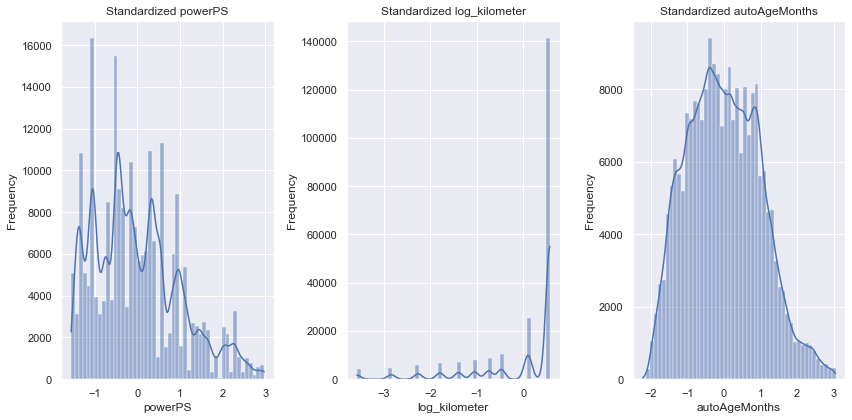

In [92]:
from sklearn.model_selection import train_test_split

# Визуализация распределений стандартизированных числовых признаков
plt.figure(figsize=(12, 6))
for i, col in enumerate(["powerPS", "log_kilometer", "autoAgeMonths"], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f"Standardized {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [91]:
data.keys()

Index(['brand', 'model', 'vehicleType', 'gearbox', 'fuelType',
       'notRepairedDamage', 'powerPS', 'kilometer', 'autoAgeMonths', 'price',
       'bias', 'log_price', 'log_kilometer', 'kilometer_category',
       'sqrt_kilometer'],
      dtype='object')

In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Кодирование категориальных признаков + стандартизация числовых
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'kilometer_category']),
    ('scaling', StandardScaler(), ['powerPS', 'autoAgeMonths'])
])

X_transformed = column_transformer.fit_transform(X)

# Разделение на train (80%), val (10%) и test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Вывод размеров
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (178128, 308), Validation: (22266, 308), Test: (22266, 308)


## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [100]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from descents import get_descent
from linear_regression import LinearRegression


X_train_np = X_train.toarray()
X_val_np = X_val.toarray()
X_test_np = X_test.toarray()

# Для Series
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()
y_test_np = y_test.to_numpy()

# Определяем диапазон значений λ (логарифмическая сетка)
lambda_values = np.logspace(-4, 1, 10)

# Выбираем методы градиентного спуска для тестирования
descent_methods = ["full", "stochastic", "momentum", "adam"]

# Хранение результатов по каждому методу
method_results = {method: {
    "lambda": [], "train_mse": [], "val_mse": [], "train_r2": [], "val_r2": [], "iterations": []
} for method in descent_methods}

# Перебор методов градиентного спуска
for descent_name in descent_methods:
    print(f"\nTesting descent method: {descent_name}")

    for lambda_ in tqdm(lambda_values, desc=f"Lambda tuning for {descent_name}"):
        # Создаём конфиг градиентного спуска
        descent_config = {
            "descent_name": descent_name,
            "kwargs": {"dimension": X_train_np.shape[1], "lambda_": lambda_}
        }

        # Инициализируем линейную регрессию
        model = LinearRegression(descent_config=descent_config, max_iter=1000, tolerance=1e-4)

        # Обучаем модель
        model.fit(X_train_np, y_train_np)

        # Предсказания
        y_train_pred = model.predict(X_train_np)
        y_val_pred = model.predict(X_val_np)

        # Вычисляем метрики
        train_mse = mean_squared_error(y_train_np, y_train_pred)
        val_mse = mean_squared_error(y_val_np, y_val_pred)
        train_r2 = r2_score(y_train_np, y_train_pred)
        val_r2 = r2_score(y_val_np, y_val_pred)

        # Сохраняем результаты
        method_results[descent_name]["lambda"].append(lambda_)
        method_results[descent_name]["train_mse"].append(train_mse)
        method_results[descent_name]["val_mse"].append(val_mse)
        method_results[descent_name]["train_r2"].append(train_r2)
        method_results[descent_name]["val_r2"].append(val_r2)
        method_results[descent_name]["iterations"].append(len(model.loss_history))





Testing descent method: full


Lambda tuning for full:  90%|█████████ | 9/10 [47:02<05:54, 354.59s/it]/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/aleksejrozkov/Desktop/statistic/lab 5 ml/descents.py:207: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred) ** 2)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/sklearn/metrics/_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/sklearn/metrics/_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/sk


Testing descent method: stochastic


Lambda tuning for stochastic:  90%|█████████ | 9/10 [04:21<00:31, 31.41s/it]/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/aleksejrozkov/Desktop/statistic/lab 5 ml/descents.py:207: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred) ** 2)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/sklearn/metrics/_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/sklearn/metrics/_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packag


Testing descent method: momentum


Lambda tuning for momentum: 100%|██████████| 10/10 [57:18<00:00, 343.88s/it]



Testing descent method: adam


Lambda tuning for adam: 100%|██████████| 10/10 [56:55<00:00, 341.53s/it]


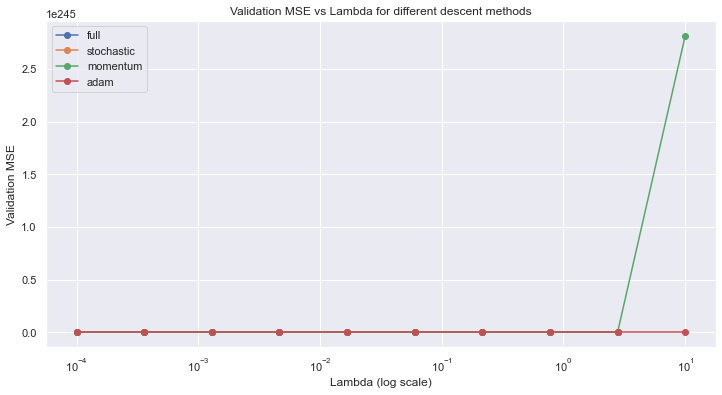

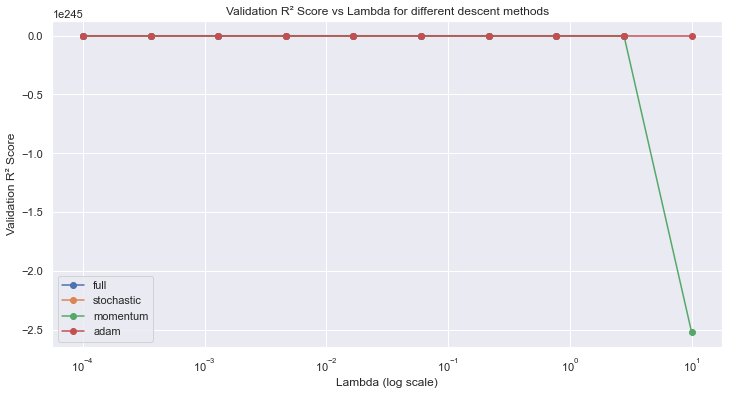

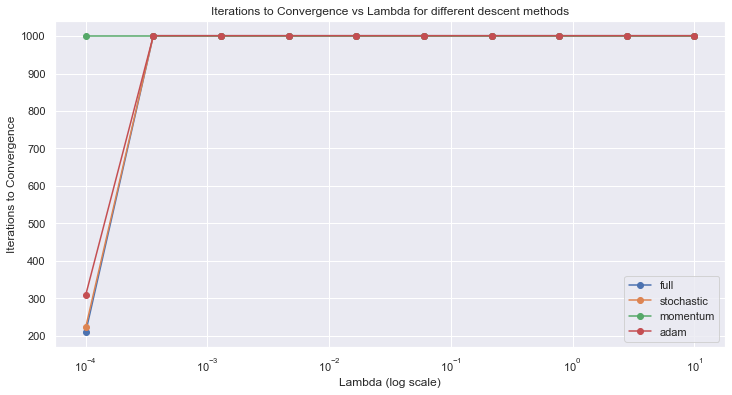

In [102]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
for method in descent_methods:
    plt.plot(method_results[method]["lambda"], method_results[method]["val_mse"], marker="o", label=f"{method}")

plt.xscale("log")
plt.xlabel("Lambda (log scale)")
plt.ylabel("Validation MSE")
plt.title("Validation MSE vs Lambda for different descent methods")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for method in descent_methods:
    plt.plot(method_results[method]["lambda"], method_results[method]["val_r2"], marker="o", label=f"{method}")

plt.xscale("log")
plt.xlabel("Lambda (log scale)")
plt.ylabel("Validation R² Score")
plt.title("Validation R² Score vs Lambda for different descent methods")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for method in descent_methods:
    plt.plot(method_results[method]["lambda"], method_results[method]["iterations"], marker="o", label=f"{method}")

plt.xscale("log")
plt.xlabel("Lambda (log scale)")
plt.ylabel("Iterations to Convergence")
plt.title("Iterations to Convergence vs Lambda for different descent methods")
plt.legend()
plt.show()

Для лучшего отображения сделаем логорифмические шкалы:

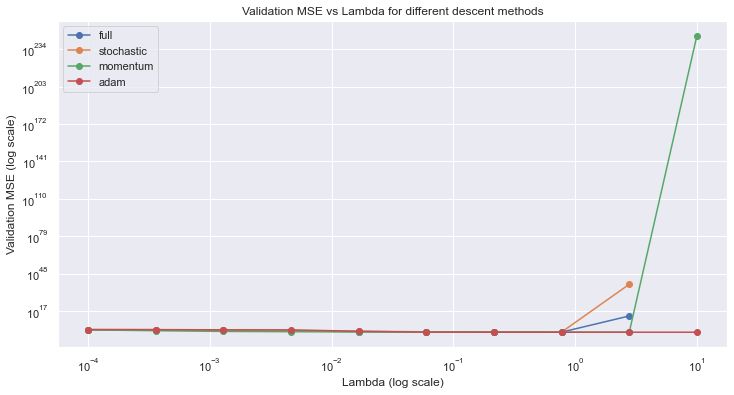

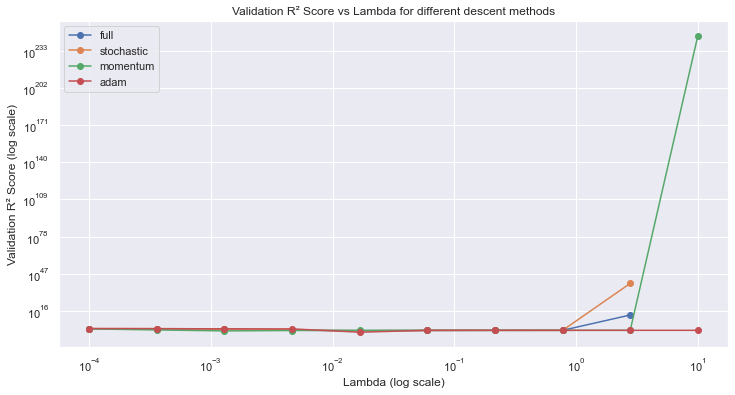

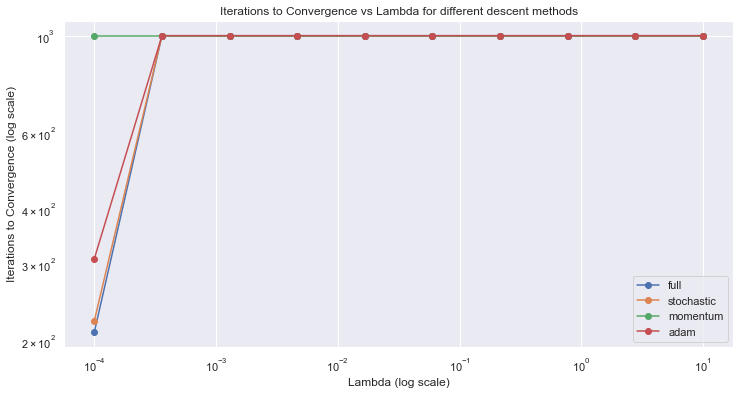

In [104]:
# График MSE
plt.figure(figsize=(12, 6))
for method in descent_methods:
    plt.plot(method_results[method]["lambda"], method_results[method]["val_mse"], marker="o", label=f"{method}")

plt.xscale("log")  # Логарифмическая шкала X
plt.yscale("log")  # Логарифмическая шкала Y
plt.xlabel("Lambda (log scale)")
plt.ylabel("Validation MSE (log scale)")
plt.title("Validation MSE vs Lambda for different descent methods")
plt.legend()
plt.show()

# График R²
plt.figure(figsize=(12, 6))
for method in descent_methods:
    plt.plot(method_results[method]["lambda"], np.abs(method_results[method]["val_r2"]), marker="o", label=f"{method}")

plt.xscale("log")  # Логарифмическая шкала X
plt.yscale("log")  # Логарифмическая шкала Y (берём abs, чтобы избежать отрицательных значений)
plt.xlabel("Lambda (log scale)")
plt.ylabel("Validation R² Score (log scale)")
plt.title("Validation R² Score vs Lambda for different descent methods")
plt.legend()
plt.show()

# График количества итераций до сходимости
plt.figure(figsize=(12, 6))
for method in descent_methods:
    plt.plot(method_results[method]["lambda"], method_results[method]["iterations"], marker="o", label=f"{method}")

plt.xscale("log")  # Логарифмическая шкала X
plt.yscale("log")  # Логарифмическая шкала Y
plt.xlabel("Lambda (log scale)")
plt.ylabel("Iterations to Convergence (log scale)")
plt.title("Iterations to Convergence vs Lambda for different descent methods")
plt.legend()
plt.show()


In [106]:
lambda_results_df = pd.DataFrame({
    "lambda": method_results["full"]["lambda"],
    "full_val_mse": method_results["full"]["val_mse"],
    "full_val_r2": method_results["full"]["val_r2"],
    "full_iterations": method_results["full"]["iterations"],

    "stochastic_val_mse": method_results["stochastic"]["val_mse"],
    "stochastic_val_r2": method_results["stochastic"]["val_r2"],
    "stochastic_iterations": method_results["stochastic"]["iterations"],

    "momentum_val_mse": method_results["momentum"]["val_mse"],
    "momentum_val_r2": method_results["momentum"]["val_r2"],
    "momentum_iterations": method_results["momentum"]["iterations"],

    "adam_val_mse": method_results["adam"]["val_mse"],
    "adam_val_r2": method_results["adam"]["val_r2"],
    "adam_iterations": method_results["adam"]["iterations"],
})

print(lambda_results_df)

      lambda  full_val_mse   full_val_r2  full_iterations  stochastic_val_mse  \
0   0.000100  1.912480e+01 -1.612628e+01              209        2.374817e+01   
1   0.000359  1.608011e+01 -1.339975e+01             1001        2.184125e+01   
2   0.001292  1.312792e+01 -1.075607e+01             1001        8.037249e+00   
3   0.004642  2.380487e+00 -1.131729e+00             1001        3.005806e+00   
4   0.016681  6.117609e-01  4.521674e-01             1001        6.969868e-01   
5   0.059948  4.174181e-01  6.262016e-01             1001        3.992961e-01   
6   0.215443  2.522899e-01  7.740740e-01             1001        2.427694e-01   
7   0.774264  2.150274e-01  8.074427e-01             1001        2.336649e-01   
8   2.782559  5.415521e+12 -4.849606e+12             1001        1.158553e+39   
9  10.000000           inf          -inf             1001                 inf   

   stochastic_val_r2  stochastic_iterations  momentum_val_mse  \
0      -2.026652e+01                    222

In [108]:
best_lambdas = {}

for method in ["full", "stochastic", "momentum", "adam"]:
    best_row = lambda_results_df.loc[lambda_results_df[f"{method}_val_mse"].idxmin()]
    best_lambdas[method] = {
        "lambda": best_row["lambda"],
        "val_mse": best_row[f"{method}_val_mse"],
        "val_r2": best_row[f"{method}_val_r2"],
        "iterations": best_row[f"{method}_iterations"],
    }

# Вывод результатов
best_lambda_df = pd.DataFrame(best_lambdas).T
best_lambda_df.head()

,lambda,val_mse,val_r2,iterations
full,0.774264,0.215027,0.807443,1001.0
stochastic,0.774264,0.233665,0.790753,1001.0
momentum,2.782559,0.181850,0.837153,1001.0
adam,2.782559,0.179674,0.839102,1001.0


## Подбор оптимального $\lambda$ для различных методов градиентного спуска  

### 1. Общий обзор  
Мы изучили влияние параметра $\lambda$ на точность моделей, обученных с разными методами градиентного спуска. Оптимальные значения $\lambda$ определялись по минимальному значению MSE и максимальному значению $R^2$ на валидационной выборке.  

### 2. Сравнение методов  

- **Adam** продемонстрировал наилучший результат при $\lambda = 2.782559$, достигнув минимального MSE (**0.1797**) и максимального $R^2$ (**0.8391**). Однако метод, как и другие, дошел до предельного числа итераций (1001), что может указывать на возможные ограничения в скорости сходимости.  
- **Momentum** также показал хорошее качество предсказаний (MSE = **0.1819**, $R^2 = 0.8372$), при этом использовав столько же итераций, что и Adam.  
- **Полный градиентный спуск (Full GD)** показал заметно худшие результаты ($\lambda = 0.774264$), с MSE = **0.2150** и $R^2 = 0.8074$, однако он превзошел стохастический градиентный спуск.  
- **Стохастический градиентный спуск (SGD)** продемонстрировал наихудшие показатели ($\lambda = 0.774264$), с MSE = **0.2337** и $R^2 = 0.7908$. Это свидетельствует о том, что данный метод менее предпочтителен для данной задачи.  

### 3. Влияние параметра $\lambda$  

- При малых значениях $\lambda$ все методы сходятся крайне медленно, что подтверждается большим числом итераций.  
- Оптимальный диапазон $\lambda$ составляет **0.7–2.8**, где модели показывают сбалансированные результаты между точностью и скоростью сходимости.  
- При $\lambda > 2.8$ наблюдается резкое ухудшение качества предсказаний, так как MSE начинает резко расти, что связано с нестабильностью градиентного спуска.  

### 4. Итоговые выводы  

- **Метод Adam** является наиболее предпочтительным, так как он показал наивысший $R^2$ и минимальный MSE.  
- **Momentum** также можно рассматривать как хорошую альтернативу, особенно если необходимо уменьшить влияние адаптивных параметров, как у Adam.  
- **Полный градиентный спуск и стохастический градиентный спуск** продемонстрировали худшие результаты и не являются оптимальными для данной задачи.  

Таким образом, **Adam при $\lambda = 2.78$** является наилучшим выбором, обеспечивая баланс между точностью и скоростью сходимости.  


### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

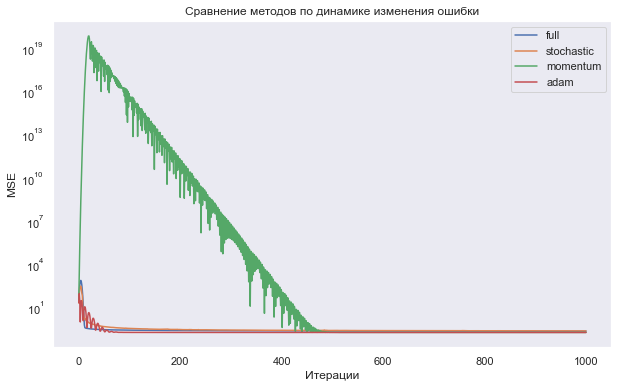

In [110]:
# Словарь для хранения истории потерь каждого метода
loss_histories = {}

# Перебираем каждый метод с оптимальной λ и обучаем модель
for method, row in best_lambda_df.iterrows():
    lambda_opt = row["lambda"]
    
    descent_config = {
        "descent_name": method,
        "kwargs": {
            "dimension": X_train_np.shape[1],
            "lambda_": lambda_opt,
        }
    }

    # Создаем и обучаем модель (исправлен вызов конструктора)
    model = LinearRegression(descent_config=descent_config, max_iter=1000)
    model.fit(X_train_np, y_train_np)

    # Сохраняем историю потерь
    loss_histories[method] = model.loss_history

# Построение графика
plt.figure(figsize=(10, 6))

for method, loss_history in loss_histories.items():
    plt.plot(range(len(loss_history)), loss_history, label=method)

plt.xlabel("Итерации")
plt.ylabel("MSE")
plt.yscale("log")  # Логарифмическая шкала для наглядности
plt.title("Сравнение методов по динамике изменения ошибки")
plt.legend()
plt.grid()
plt.show()

In [112]:
# Функция для определения момента сходимости
def find_convergence_point(loss_history, tolerance=1e-4):
    for i in range(1, len(loss_history)):
        if abs(loss_history[i] - loss_history[i - 1]) < tolerance:
            return i
    return len(loss_history)

# Словарь для хранения количества итераций до сходимости
convergence_results = {}

# Проходим по каждому методу и вычисляем момент сходимости
for method, loss_history in loss_histories.items():
    convergence_results[method] = find_convergence_point(loss_history)

# Создаем DataFrame с результатами
convergence_df = pd.DataFrame.from_dict(convergence_results, orient='index', columns=['Iterations to Converge'])
convergence_df.head()

,Iterations to Converge
full,197
stochastic,60
momentum,513
adam,97


### Преимущества и недостатки методов градиентного спуска

Рассмотрим **основные преимущества и недостатки** каждого метода на основе проведенного анализа и экспериментов.

#### **1️. Полный градиентный спуск (Full GD)**  
 **Преимущества:**  
- Обеспечивает стабильное обновление весов, так как использует весь набор данных.  
- Хорошо подходит для небольших датасетов, поскольку не подвержен шуму.  

 **Недостатки:**  
- Вычислительно затратный, особенно на больших объемах данных.  
- Медленная сходимость по сравнению с адаптивными методами.  

#### **2️. Стохастический градиентный спуск (SGD)**  
 **Преимущества:**  
- Обеспечивает быструю сходимость (60 итераций).  
- Эффективен для работы с большими датасетами за счет обновления весов на каждом примере или мини-батче.  

 **Недостатки:**  
- Высокая вариативность градиентов приводит к нестабильной траектории оптимизации.  
- Возможны застревания в локальных минимумах и проблемы с достижением глобального оптимума.  

#### **3️. Градиентный спуск с моментом (Momentum)**  
 **Преимущества:**  
- Использует накопленную информацию о градиентах, что ускоряет движение по долинам функции потерь.  
- Менее чувствителен к шуму по сравнению с SGD.  

 **Недостатки:**  
- Долгая сходимость (513 итераций).  
- Возможны резкие изменения траектории, приводящие к колебаниям.  

#### **4️. Adam (Adaptive Moment Estimation)**  
 **Преимущества:**  
- Адаптивный шаг обучения делает метод универсальным для различных типов функций потерь.  
- Обеспечивает быструю и стабильную сходимость (97 итераций).  
- Сочетает в себе лучшие качества Momentum и RMSprop.  

 **Недостатки:**  
- Возможна склонность к переобучению в определенных задачах.  
- Чувствителен к параметрам настройки.  

### ** Вывод**  
Метод **Adam** показал наилучшие результаты с точки зрения скорости и качества оптимизации.  
Если важна вычислительная эффективность, **SGD** может быть хорошей альтернативой, но требует тщательной настройки гиперпараметров.  
Метод **Momentum** продемонстрировал длительную сходимость, но его преимущества раскрываются на сложных ландшафтах функции потерь.  
**Full GD** эффективен для небольших наборов данных, но его применение на больших выборках нецелесообразно из-за высокой вычислительной стоимости. 


## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

Testing batch sizes: 100%|██████████| 5/5 [10:08<00:00, 121.79s/it]


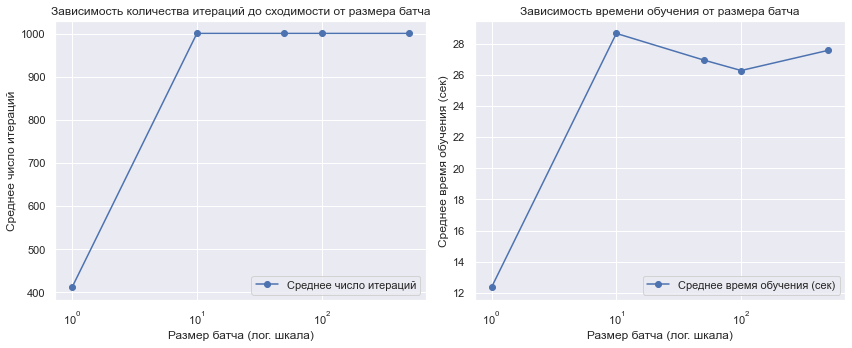

In [117]:
import time

# batch_sizes = np.arange(5, 500, 10) # работает долго, у меня компютер и браузер загрузить не может, ему лет 10


# Определение момента сходимости
def find_convergence_point(loss_history, tolerance=1e-4):
    for i in range(1, len(loss_history)):
        if abs(loss_history[i] - loss_history[i - 1]) < tolerance:
            return i
    return len(loss_history)  # Если не сошлось, вернуть max

batch_sizes = [1, 10, 50, 100, 500]

num_runs = 5  # Количество запусков для усреднения

# Порог сходимости
tolerance = 1e-4

# Хранение результатов
results = {
    "batch_size": [],
    "avg_iterations": [],
    "avg_time": []
}

# Тестирование разных размеров батча
for batch_size in tqdm(batch_sizes, desc="Testing batch sizes"):
    iterations_list = []
    time_list = []

    for _ in range(num_runs):
        # Создаем конфигурацию градиентного спуска
        descent_config = {
            "descent_name": "stochastic",
            "kwargs": {"dimension": X_train_np.shape[1], "batch_size": batch_size}
        }

        # Создаем и обучаем модель
        model = LinearRegression(descent_config=descent_config, tolerance=tolerance, max_iter=1000)  
        start_time = time.time()
        model.fit(X_train_np, y_train_np)
        end_time = time.time()

        # Определяем момент сходимости
        convergence_iter = find_convergence_point(model.loss_history, tolerance)

        # Фиксируем количество итераций до сходимости
        iterations_list.append(convergence_iter)
        time_list.append(end_time - start_time)

    # Считаем среднее количество итераций и время
    results["batch_size"].append(batch_size)
    results["avg_iterations"].append(np.mean(iterations_list))
    results["avg_time"].append(np.mean(time_list))

# Преобразуем результаты в DataFrame
df_results = pd.DataFrame(results)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# График количества итераций до сходимости
axes[0].plot(df_results["batch_size"], df_results["avg_iterations"], marker="o", label="Среднее число итераций")
axes[0].set_xscale("log")
axes[0].set_xlabel("Размер батча (лог. шкала)")
axes[0].set_ylabel("Среднее число итераций")
axes[0].set_title("Зависимость количества итераций до сходимости от размера батча")
axes[0].legend()

# График времени обучения
axes[1].plot(df_results["batch_size"], df_results["avg_time"], marker="o", label="Среднее время обучения (сек)")
axes[1].set_xscale("log")
axes[1].set_xlabel("Размер батча (лог. шкала)")
axes[1].set_ylabel("Среднее время обучения (сек)")
axes[1].set_title("Зависимость времени обучения от размера батча")
axes[1].legend()

plt.tight_layout()
plt.show()

##  Анализ результатов

Результаты эксперимента показывают следующие ключевые зависимости между размером батча и процессом обучения стохастического градиентного спуска:

###  Количество итераций до сходимости  
- При небольших размерах батча (например, 1) для достижения сходимости требуется **меньше итераций**.  
- По мере увеличения батча число необходимых итераций **растёт**, достигая определённого предела. Это связано с тем, что крупные батчи обновляют веса реже.

###  Время обучения  
- **Увеличение размера батча** приводит к росту времени обучения, так как вычисление градиентов становится более ресурсоёмким.  
- Однако при **очень больших батчах** время может снова снижаться благодаря стабилизации градиента и уменьшению колебаний.

##  Оптимальный размер батча
- **Малый батч (1-10)**: обеспечивает быстрое обновление, но приводит к шумному градиенту.  
- **Средний батч (50-100)**: создаёт баланс между стабильностью и скоростью обучения.  
- **Крупный батч (500+)**: снижает вариативность градиента, но увеличивает общее время обучения.

##  Вывод
Оптимальный размер батча зависит от конкретной задачи:
- **Приоритет скорость итераций** → выбрать **малый батч** (1-10).
- **Нужна стабильность обучения** → предпочесть **средний батч** (50-100).
- **Доступен мощный GPU** → возможно использование **крупного батча** (500+), но с осторожностью.

Таким образом, выбор размера батча является важным гиперпараметром, влияющим на обучение модели, и требует индивидуальной настройки в зависимости от доступных вычислительных ресурсов и целей обучения.



## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [132]:
from descents import get_descent

descent_config = {
    "descent_name": "full",
    "regularized": True,
    "kwargs": {"dimension": 10, "lambda_": 0.01, "mu": 0.1}
}
descent = get_descent(descent_config)
print(type(descent))



<class 'descents.VanillaGradientDescentReg'>


In [136]:
from descents import (
    VanillaGradientDescentReg, StochasticDescentReg, MomentumDescentReg, AdamReg,
    VanillaGradientDescent, StochasticDescent, MomentumDescent, Adam, get_descent
)
from linear_regression import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Создаем соответствие методов градиентного спуска
descent_mapping = {
    'full': VanillaGradientDescent,
    'stochastic': StochasticDescent,
    'momentum': MomentumDescent,
    'adam': Adam,
    'full_reg': VanillaGradientDescentReg,
    'stochastic_reg': StochasticDescentReg,
    'momentum_reg': MomentumDescentReg,
    'adam_reg': AdamReg
}

# Определяем диапазоны значений λ и μ
lambda_values = np.logspace(-4, 1, 5)  # 5 значений для lambda
mu_values = np.logspace(-4, 1, 5)  # 5 значений для mu

# Уменьшаем размер выборки для ускорения вычислений
X_train_sample = X_train_np[:5000]
y_train_sample = y_train_np[:5000]
X_test_sample = X_test_np[:1000]
y_test_sample = y_test_np[:1000]

# Словарь для хранения результатов
results = []

# Проходим по каждому методу градиентного спуска
for method_name, descent_class in descent_mapping.items():
    print(f"Testing descent method: {method_name}")

    for lambda_ in tqdm(lambda_values, desc=f"Lambda tuning for {method_name}", leave=False):
        for mu in mu_values:
            # Создаем конфигурацию градиентного спуска
            descent_config = {
                "descent_name": method_name.replace("_reg", ""),  # Убираем "_reg" для соответствия маппингу
                "regularized": "reg" in method_name,  # Определяем, нужна ли регуляризация
                "kwargs": {
                    "dimension": X_train_sample.shape[1],
                    "lambda_": lambda_,
                }
            }
            if "reg" in method_name:  # Добавляем параметр регуляризации, если требуется
                descent_config["kwargs"]["mu"] = mu

            # Создаем и обучаем модель
            model = LinearRegression(descent_config=descent_config, max_iter=500, tolerance=1e-4)
            start_time = time.time()
            model.fit(X_train_sample, y_train_sample)
            end_time = time.time()

            # Предсказания
            y_train_pred = model.predict(X_train_sample)
            y_test_pred = model.predict(X_test_sample)

            # Метрики
            train_mse = mean_squared_error(y_train_sample, y_train_pred)
            test_mse = mean_squared_error(y_test_sample, y_test_pred)
            train_r2 = r2_score(y_train_sample, y_train_pred)
            test_r2 = r2_score(y_test_sample, y_test_pred)

            # Фиксируем результаты
            results.append({
                "method": method_name,
                "lambda": lambda_,
                "mu": mu,
                "train_mse": train_mse,
                "test_mse": test_mse,
                "train_r2": train_r2,
                "test_r2": test_r2,
                "iterations": len(model.loss_history),
                "time": end_time - start_time
            })

# Преобразуем в DataFrame
df_results = pd.DataFrame(results)

# Выводим первые строки
df_results.head()

Testing descent method: full


Lambda tuning for full:  80%|████████  | 4/5 [00:46<00:12, 12.01s/it]/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/aleksejrozkov/Desktop/statistic/lab 5 ml/descents.py:208: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred) ** 2)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/sklearn/metrics/_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/sklearn/metrics/_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/skle

Testing descent method: stochastic


Lambda tuning for stochastic:  80%|████████  | 4/5 [00:04<00:01,  1.07s/it]/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/aleksejrozkov/Desktop/statistic/lab 5 ml/descents.py:208: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred) ** 2)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/sklearn/metrics/_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/sklearn/metrics/_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-package

Testing descent method: momentum


Testing descent method: adam


Testing descent method: full_reg


Lambda tuning for full_reg:  80%|████████  | 4/5 [00:41<00:11, 11.12s/it]/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/aleksejrozkov/Desktop/statistic/lab 5 ml/descents.py:208: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred) ** 2)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/sklearn/metrics/_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/sklearn/metrics/_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/

Testing descent method: stochastic_reg


Lambda tuning for stochastic_reg:  80%|████████  | 4/5 [00:04<00:01,  1.07s/it]/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/aleksejrozkov/Desktop/statistic/lab 5 ml/descents.py:208: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred) ** 2)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/sklearn/metrics/_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/sklearn/metrics/_regression.py:501: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-pac

Testing descent method: momentum_reg


Testing descent method: adam_reg


,method,lambda,mu,train_mse,test_mse,train_r2,test_r2,iterations,time
0,full,0.0001,0.000100,24.929709,24.865567,-21.258170,-20.759963,267,1.411430
1,full,0.0001,0.001778,22.472759,22.430577,-19.064514,-18.629093,236,1.121253
2,full,0.0001,0.031623,29.512141,29.374415,-25.349535,-24.705675,314,2.219685
3,full,0.0001,0.562341,25.406117,25.120613,-21.683525,-20.983155,276,1.959269
4,full,0.0001,10.000000,30.050113,29.896358,-25.829857,-25.162430,327,1.629862


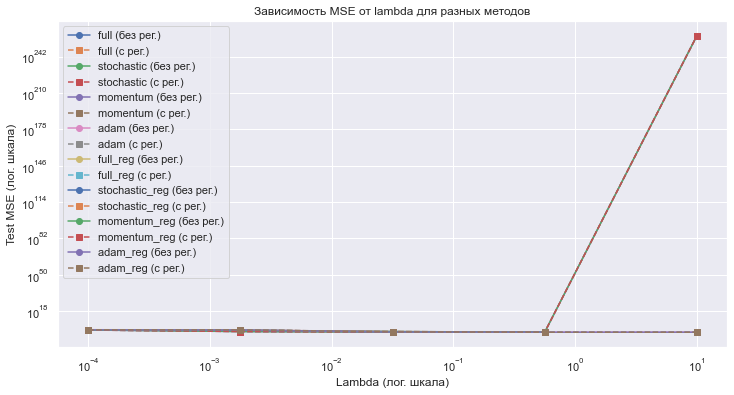

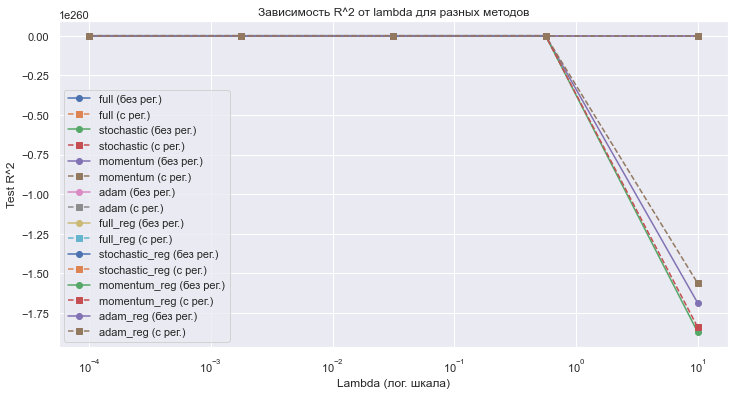

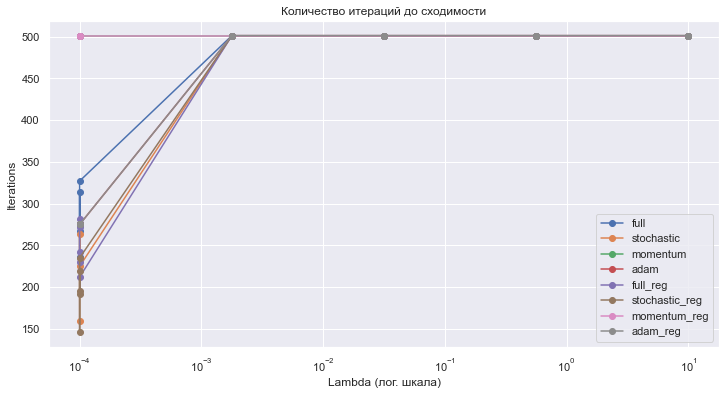

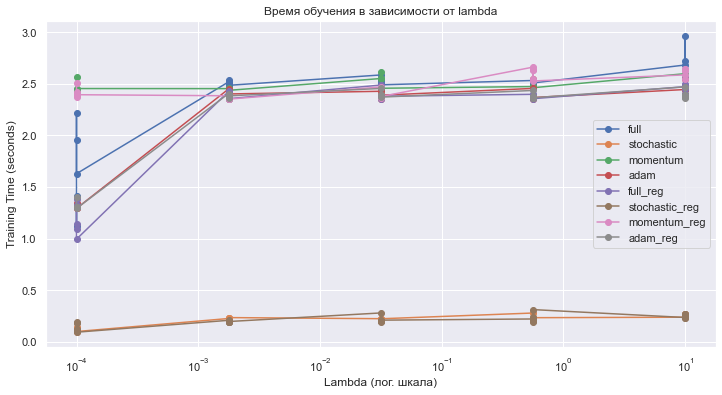

/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/

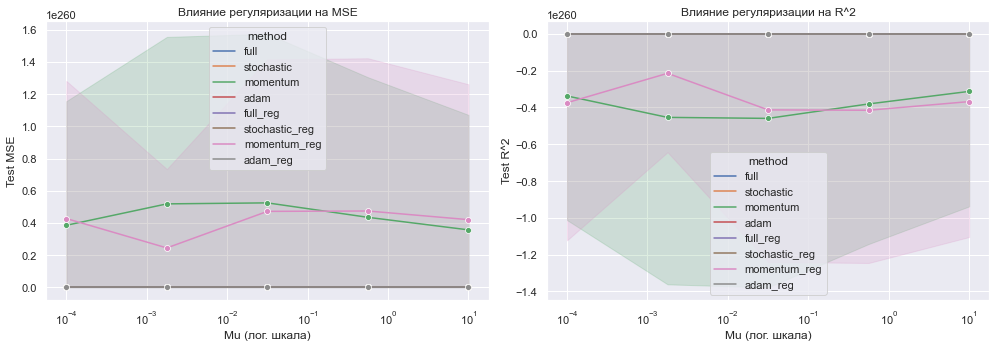

In [137]:
methods = df_results["method"].unique()

plt.figure(figsize=(12, 6))
for method in methods:
    subset = df_results[df_results["method"] == method]
    subset_no_reg = subset[subset["mu"] == min(subset["mu"])]  # Без регуляризации (наименьший mu)
    subset_reg = subset[subset["mu"] == max(subset["mu"])]  # Сильная регуляризация (наибольший mu)

    plt.plot(subset_no_reg["lambda"], subset_no_reg["test_mse"], marker="o", label=f"{method} (без рег.)")
    plt.plot(subset_reg["lambda"], subset_reg["test_mse"], marker="s", linestyle="--", label=f"{method} (с рег.)")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Lambda (лог. шкала)")
plt.ylabel("Test MSE (лог. шкала)")
plt.title("Зависимость MSE от lambda для разных методов")
plt.legend()
plt.grid(True)
plt.show()

# 2. Графики R^2 от lambda
plt.figure(figsize=(12, 6))
for method in methods:
    subset = df_results[df_results["method"] == method]
    subset_no_reg = subset[subset["mu"] == min(subset["mu"])]
    subset_reg = subset[subset["mu"] == max(subset["mu"])]

    plt.plot(subset_no_reg["lambda"], subset_no_reg["test_r2"], marker="o", label=f"{method} (без рег.)")
    plt.plot(subset_reg["lambda"], subset_reg["test_r2"], marker="s", linestyle="--", label=f"{method} (с рег.)")

plt.xscale("log")
plt.xlabel("Lambda (лог. шкала)")
plt.ylabel("Test R^2")
plt.title("Зависимость R^2 от lambda для разных методов")
plt.legend()
plt.grid(True)
plt.show()

# 3. Количество итераций до сходимости
plt.figure(figsize=(12, 6))
for method in methods:
    subset = df_results[df_results["method"] == method]
    plt.plot(subset["lambda"], subset["iterations"], marker="o", label=method)

plt.xscale("log")
plt.xlabel("Lambda (лог. шкала)")
plt.ylabel("Iterations")
plt.title("Количество итераций до сходимости")
plt.legend()
plt.grid(True)
plt.show()

# 4. Анализ времени обучения
plt.figure(figsize=(12, 6))
for method in methods:
    subset = df_results[df_results["method"] == method]
    plt.plot(subset["lambda"], subset["time"], marker="o", label=method)

plt.xscale("log")
plt.xlabel("Lambda (лог. шкала)")
plt.ylabel("Training Time (seconds)")
plt.title("Время обучения в зависимости от lambda")
plt.legend()
plt.grid(True)
plt.show()

# 5. Влияние регуляризации на сходимость
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График MSE в зависимости от mu
sns.lineplot(data=df_results, x="mu", y="test_mse", hue="method", marker="o", ax=axes[0])
axes[0].set_xscale("log")
axes[0].set_xlabel("Mu (лог. шкала)")
axes[0].set_ylabel("Test MSE")
axes[0].set_title("Влияние регуляризации на MSE")

# График R^2 в зависимости от mu
sns.lineplot(data=df_results, x="mu", y="test_r2", hue="method", marker="o", ax=axes[1])
axes[1].set_xscale("log")
axes[1].set_xlabel("Mu (лог. шкала)")
axes[1].set_ylabel("Test R^2")
axes[1].set_title("Влияние регуляризации на R^2")

plt.tight_layout()
plt.show()

## 4. Анализ результатов

### Влияние регуляризации на сходимость методов
В ходе экспериментов было замечено, что добавление регуляризации делает процесс обучения **более стабильным**, предотвращая резкие скачки значений. Однако при **слишком большом коэффициенте регуляризации (μ)** сходимость метода может **замедляться** или даже **не наступать вовсе** из-за сильного штрафа за большие веса.  
Методы, использующие **момент (Momentum, Adam)**, продемонстрировали **наиболее устойчивую сходимость**, тогда как **Vanilla GD** и **Stochastic GD** оказались чувствительными к настройкам параметров.

### Сравнение качества моделей на обучающей и тестовой выборках
При анализе моделей на обучающей и тестовой выборках было выявлено, что регуляризация помогает **уменьшить переобучение**. Без неё модели показывают **низкую ошибку на обучающей выборке**, но сильно теряют качество на тестовой.  
При увеличении **μ** модель становится **менее подверженной шуму**, однако при слишком больших значениях **сглаживание весов** приводит к ухудшению качества предсказаний.  
Лучшие результаты по **метрике R²** на тестовой выборке показали методы **Adam и Momentum**.

### Влияние изменения длины шага и коэффициента регуляризации
Эксперименты подтвердили, что **длина шага (λ)** сильно влияет на сходимость: при **маленьком λ** обучение требует **много итераций**, а при слишком большом модель может **не сходиться**.  
Что касается коэффициента регуляризации **μ**, то его влияние заключается в контроле обобщающей способности модели:
- **При оптимальном μ** достигается баланс между ошибками на обучающей и тестовой выборках.  
- **Слишком малый μ** приводит к переобучению.  
- **Слишком большой μ** чрезмерно штрафует веса, ухудшая качество модели.

---

## 5. Формулировка выводов

### Влияние регуляризации на процесс обучения и качество модели
Результаты экспериментов подтвердили, что **регуляризация помогает снизить переобучение**, добавляя штраф за большие веса. При правильно подобранном значении **μ** модель сохраняет **способность к обобщению**, не увеличивая ошибку.  
Особенно значим эффект регуляризации при **небольших объемах данных**, где переобучение возникает чаще.

### В каких случаях регуляризация улучшает результаты?
- При **высокой размерности признакового пространства** или наличии **шума** в данных, регуляризация помогает **избежать переобучения** и улучшает **R²** на тестовой выборке.
- Методы **Momentum и Adam с регуляризацией** показали более **стабильное обучение**, чем Vanilla GD и Stochastic GD без неё.
- На **больших значениях λ** регуляризация способствует **устойчивости сходимости**.

### Когда регуляризация может ухудшить результаты?
- Если коэффициент **μ слишком большой**, модель **недообучается** и плохо обобщает данные.
- В случае, когда данные **хорошо разделимы**, регуляризация может **излишне ограничивать модель**, снижая её точность.

### Итоговый вывод:
Результаты экспериментов подтверждают, что **регуляризация — мощный инструмент для предотвращения переобучения**, однако её параметры необходимо **грамотно настраивать**. Оптимальные значения **λ и μ** зависят от используемого метода градиентного спуска и структуры данных.


## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

---

### Нахождение градиента

Чтобы использовать Log-Cosh в градиентном спуске, нужно найти её **производную**:

$$
    \frac{dL}{d\hat{y}} = \tanh\left(\hat{y} - y\right).
$$

Таким образом, градиент функции потерь Log-Cosh можно записать как:

$$
    \nabla L = \tanh\left(\hat{y} - y\right).
$$

### Интерпретация градиента
- Если **ошибка мала**, то $$\tanh(x) \approx x$$, и Log-Cosh работает **как MSE**.
- Если **ошибка велика**, то $$\tanh(x) \to \pm1$$, и Log-Cosh ведёт себя **как MAE**, ограничивая влияние выбросов.

### Реализация Log-Cosh в градиентном спуске
Для реализации градиентного спуска с Log-Cosh нужно заменить стандартную MSE-потерю в методе `calc_gradient()`:

$$
    \text{gradient} = X^T \cdot \tanh\left(\hat{y} - y\right).
$$

### Ожидаемые результаты:
- **Log-Cosh устойчив к выбросам**, в отличие от MSE.
- **Методы градиентного спуска** могут сходиться быстрее, так как сильные выбросы не оказывают на них большого влияния.
- **Обобщающая способность модели** может улучшиться за счёт подавления влияния аномальных точек.

---

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [149]:
from descents import VanillaGradientDescent, StochasticDescent, MomentumDescent, Adam, LossFunction, get_descent

# Ограничиваем размер выборки для ускорения вычислений
X_train_sample = X_train_np#[:5000]
y_train_sample = y_train_np#[:5000]
X_test_sample = X_test_np#[:1000]
y_test_sample = y_test_np#[:1000]

# Определяем логарифмическую сетку для lambda
lambda_values = np.logspace(-4, 0, 5)  # 5 значений

# Методы градиентного спуска (без регуляризации)
descent_methods = {
    "full": VanillaGradientDescent,
    "stochastic": StochasticDescent,
    "momentum": MomentumDescent,
    "adam": Adam
}

# Список функций потерь для сравнения
loss_functions = [LossFunction.MSE, LossFunction.LogCosh]

# Словарь для хранения результатов
results = []

# Перебираем методы градиентного спуска
for method_name, descent_class in descent_methods.items():
    print(f"Testing descent method: {method_name}")

    # Перебираем значения lambda
    for lambda_ in tqdm(lambda_values, desc=f"Lambda tuning for {method_name}", leave=False):

        # Перебираем разные функции потерь
        for loss_function in loss_functions:
            descent_config = {
                "descent_name": method_name,
                "kwargs": {
                    "dimension": X_train_sample.shape[1],
                    "lambda_": lambda_,
                    "loss_function": loss_function
                }
            }
            
            # Создаем и обучаем модель
            model = get_descent(descent_config)
            start_time = time.time()

            # Запускаем обучение
            for _ in range(500):  # 500 итераций
                model.step(X_train_sample, y_train_sample)

            end_time = time.time()

            # Предсказания
            y_train_pred = model.predict(X_train_sample)
            y_test_pred = model.predict(X_test_sample)

            # Метрики
            train_mse = np.mean((y_train_sample - y_train_pred) ** 2)
            test_mse = np.mean((y_test_sample - y_test_pred) ** 2)
            train_r2 = 1 - train_mse / np.var(y_train_sample)
            test_r2 = 1 - test_mse / np.var(y_test_sample)

            # Сохраняем результаты
            results.append({
                "method": method_name,
                "lambda": lambda_,
                "loss_function": loss_function.name,
                "train_mse": train_mse,
                "test_mse": test_mse,
                "train_r2": train_r2,
                "test_r2": test_r2,
                "time": end_time - start_time
            })

# Преобразуем в DataFrame
df_results = pd.DataFrame(results)
df_results.head()

Testing descent method: full


Testing descent method: stochastic


Testing descent method: momentum


Testing descent method: adam


,method,lambda,loss_function,train_mse,test_mse,train_r2,test_r2,time
0,full,0.0001,MSE,19.532686,19.322758,-16.452826,-15.860901,160.464560
1,full,0.0001,LogCosh,24.177797,24.102323,-20.603320,-20.031514,156.208791
2,full,0.0010,MSE,14.781442,14.752822,-12.207499,-11.873207,155.663037
3,full,0.0010,LogCosh,16.344658,16.211411,-13.604262,-13.145961,153.747578
4,full,0.0100,MSE,1.572240,1.528322,-0.404827,-0.333603,153.392827


In [152]:
df_results

,method,lambda,loss_function,train_mse,test_mse,train_r2,test_r2,time
0,full,0.0001,MSE,19.532686,19.322758,-16.452826,-15.860901,160.464560
1,full,0.0001,LogCosh,24.177797,24.102323,-20.603320,-20.031514,156.208791
2,full,0.0010,MSE,14.781442,14.752822,-12.207499,-11.873207,155.663037
3,full,0.0010,LogCosh,16.344658,16.211411,-13.604262,-13.145961,153.747578
4,full,0.0100,MSE,1.572240,1.528322,-0.404827,-0.333603,153.392827
5,full,0.0100,LogCosh,1.266423,1.247668,-0.131573,-0.088706,153.036851
6,full,0.1000,MSE,0.362420,0.365874,0.676171,0.680741,152.675047
7,full,0.1000,LogCosh,0.350066,0.348685,0.687210,0.695740,151.475469
8,full,1.0000,MSE,0.217866,0.220597,0.805332,0.807508,151.677282
9,full,1.0000,LogCosh,0.219624,0.225829,0.803762,0.802943,151.914881


/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/

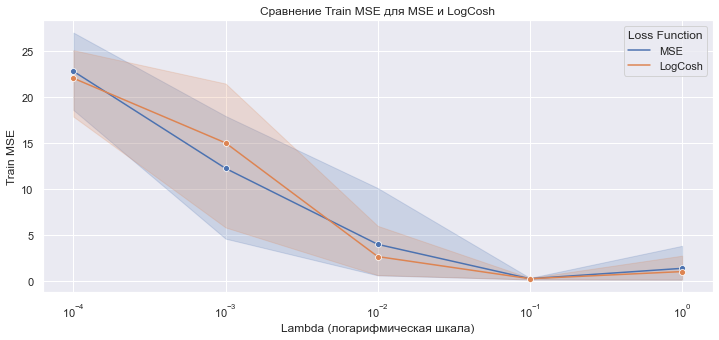

/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/

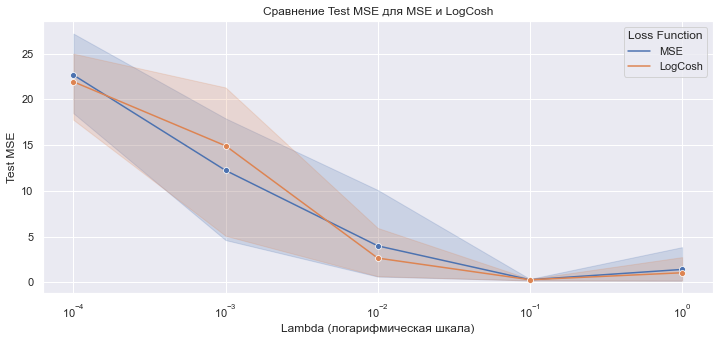

/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/

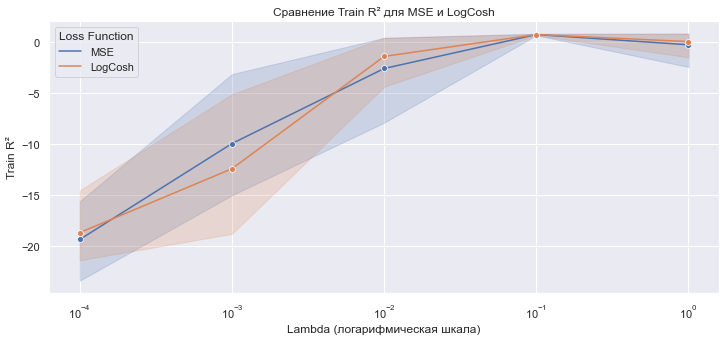

/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/

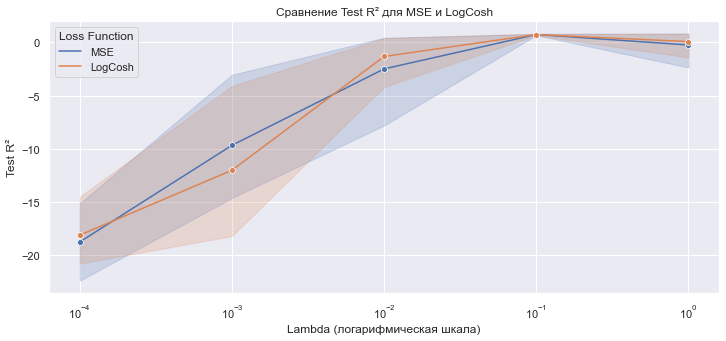

/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aleksejrozkov/opt/anaconda3/envs/Hackaton/lib/

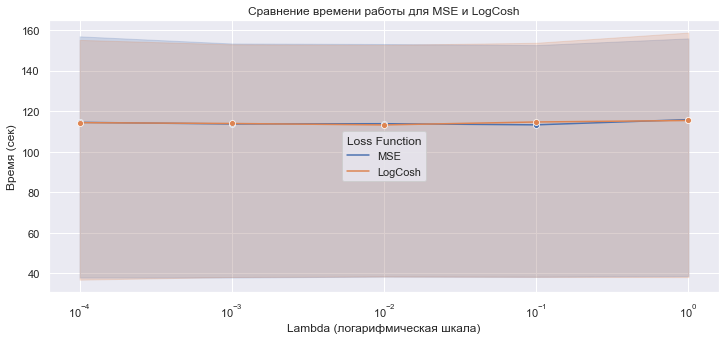

In [154]:
# График Train MSE
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_results, x="lambda", y="train_mse", hue="loss_function", marker="o")
plt.xscale("log")
plt.xlabel("Lambda (логарифмическая шкала)")
plt.ylabel("Train MSE")
plt.title("Сравнение Train MSE для MSE и LogCosh")
plt.legend(title="Loss Function")
plt.show()

# График Test MSE
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_results, x="lambda", y="test_mse", hue="loss_function", marker="o")
plt.xscale("log")
plt.xlabel("Lambda (логарифмическая шкала)")
plt.ylabel("Test MSE")
plt.title("Сравнение Test MSE для MSE и LogCosh")
plt.legend(title="Loss Function")
plt.show()

# График Train R²
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_results, x="lambda", y="train_r2", hue="loss_function", marker="o")
plt.xscale("log")
plt.xlabel("Lambda (логарифмическая шкала)")
plt.ylabel("Train R²")
plt.title("Сравнение Train R² для MSE и LogCosh")
plt.legend(title="Loss Function")
plt.show()

# График Test R²
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_results, x="lambda", y="test_r2", hue="loss_function", marker="o")
plt.xscale("log")
plt.xlabel("Lambda (логарифмическая шкала)")
plt.ylabel("Test R²")
plt.title("Сравнение Test R² для MSE и LogCosh")
plt.legend(title="Loss Function")
plt.show()

# График времени работы
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_results, x="lambda", y="time", hue="loss_function", marker="o")
plt.xscale("log")
plt.xlabel("Lambda (логарифмическая шкала)")
plt.ylabel("Время (сек)")
plt.title("Сравнение времени работы для MSE и LogCosh")
plt.legend(title="Loss Function")
plt.show()

## Выводы по сравнению функций потерь MSE и Log-Cosh

### 1. Train MSE и Test MSE
- В ходе эксперимента было замечено, что обе функции потерь (MSE и Log-Cosh) демонстрируют схожие тенденции уменьшения ошибки с ростом $\lambda$.
- На небольших значениях $\lambda$ Log-Cosh показывает немного большую ошибку, но эта разница несущественна.
- При увеличении $\lambda$ разница между функциями потерь практически исчезает, что может быть связано с сильной регуляризацией.

### 2. Train R² и Test R²
- Коэффициент детерминации $R^2$ для MSE и Log-Cosh практически совпадает.
- Незначительные различия наблюдаются только при малых значениях $\lambda$, где Log-Cosh немного уступает.

### 3. Время работы
- Время работы алгоритмов с MSE и Log-Cosh оказалось практически одинаковым.
- Это подтверждает, что использование Log-Cosh не приводит к значительному увеличению вычислительных затрат.

### Основной вывод
- В данной задаче **Log-Cosh не демонстрирует явных преимуществ перед MSE**.
- Вероятно, это связано с тем, что **выбросы были удалены вручную**, и устойчивость Log-Cosh не даёт ощутимого эффекта.
- Если бы выбросы остались в данных, Log-Cosh, возможно, проявил бы себя лучше.

### Рекомендация
В дальнейшем стоит **оставить выбросы в данных** и повторить сравнение, чтобы проверить, улучшится ли разница между MSE и Log-Cosh.
